In [53]:
'''Problem Definition:
Primary Objective: To identify and quantify the variables that significantly impact the demand for shared electric cycles
provided by Yulu in the Indian market.

Context: Yulu has experienced a notable decline in its revenues, prompting the need to critically analyze and
understand the dynamics affecting the usage of its shared electric cycles. This analysis is vital for strategic planning, 
improving service efficiency, and enhancing customer satisfaction.

Scope: 
The analysis will focus on various potential factors such as temporal elements (time of the day, day of the week, month, season), 
weather conditions (clear, cloudy, rain, fog, etc.), environmental factors (temperature, humidity, windspeed), and socio-economic factors 
(holidays, working days). Understanding how these variables correlate with the demand for electric cycles will provide actionable insights for Yulu.

Additional Views for Consideration:
 Differentiating between casual and registered users to understand their distinct patterns and preferences.
 Studying the impact of local events, significant public gatherings on the demand for shared electric cycles.


'''

'Problem Definition:\nPrimary Objective: To identify and quantify the variables that significantly impact the demand for shared electric cycles\nprovided by Yulu in the Indian market.\n\nContext: Yulu has experienced a notable decline in its revenues, prompting the need to critically analyze and\nunderstand the dynamics affecting the usage of its shared electric cycles. This analysis is vital for strategic planning, \nimproving service efficiency, and enhancing customer satisfaction.\n\nScope: \nThe analysis will focus on various potential factors such as temporal elements (time of the day, day of the week, month, season), \nweather conditions (clear, cloudy, rain, fog, etc.), environmental factors (temperature, humidity, windspeed), and socio-economic factors \n(holidays, working days). Understanding how these variables correlate with the demand for electric cycles will provide actionable insights for Yulu.\n\nAdditional Views for Consideration:\n Differentiating between casual and re

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

df = pd.read_csv("E:\\scaler\\case studies\\yulu\\yulu.csv")

In [55]:
df.shape

(10886, 12)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [57]:
df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [58]:
catcols = df.dtypes=='object'
catcols=list(catcols[catcols].index)
catcols

['datetime']

In [59]:
numcols = df.dtypes!='object'
numcols=list(numcols[numcols].index)
numcols

['season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'casual',
 'registered',
 'count']

In [60]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [61]:
df.describe(include=['object'])


,datetime
count,10886
unique,10886
top,01-01-2011 00:00
freq,1


In [62]:
for column in df.columns:
    print(f"Value counts for {column}:")
    print(df[column].value_counts())
    print('\n')

Value counts for datetime:
datetime
01-01-2011 00:00    1
01-05-2012 21:00    1
01-05-2012 13:00    1
01-05-2012 14:00    1
01-05-2012 15:00    1
                   ..
02-09-2011 04:00    1
02-09-2011 05:00    1
02-09-2011 06:00    1
02-09-2011 07:00    1
19-12-2012 23:00    1
Name: count, Length: 10886, dtype: int64


Value counts for season:
season
4    2734
2    2733
3    2733
1    2686
Name: count, dtype: int64


Value counts for holiday:
holiday
0    10575
1      311
Name: count, dtype: int64


Value counts for workingday:
workingday
1    7412
0    3474
Name: count, dtype: int64


Value counts for weather:
weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64


Value counts for temp:
temp
14.76    467
26.24    453
28.70    427
13.94    413
18.86    406
22.14    403
25.42    403
16.40    400
22.96    395
27.06    394
24.60    390
12.30    385
21.32    362
17.22    356
13.12    356
29.52    353
10.66    332
18.04    328
20.50    327
30.34    299
9.84     294
15.5

In [63]:
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

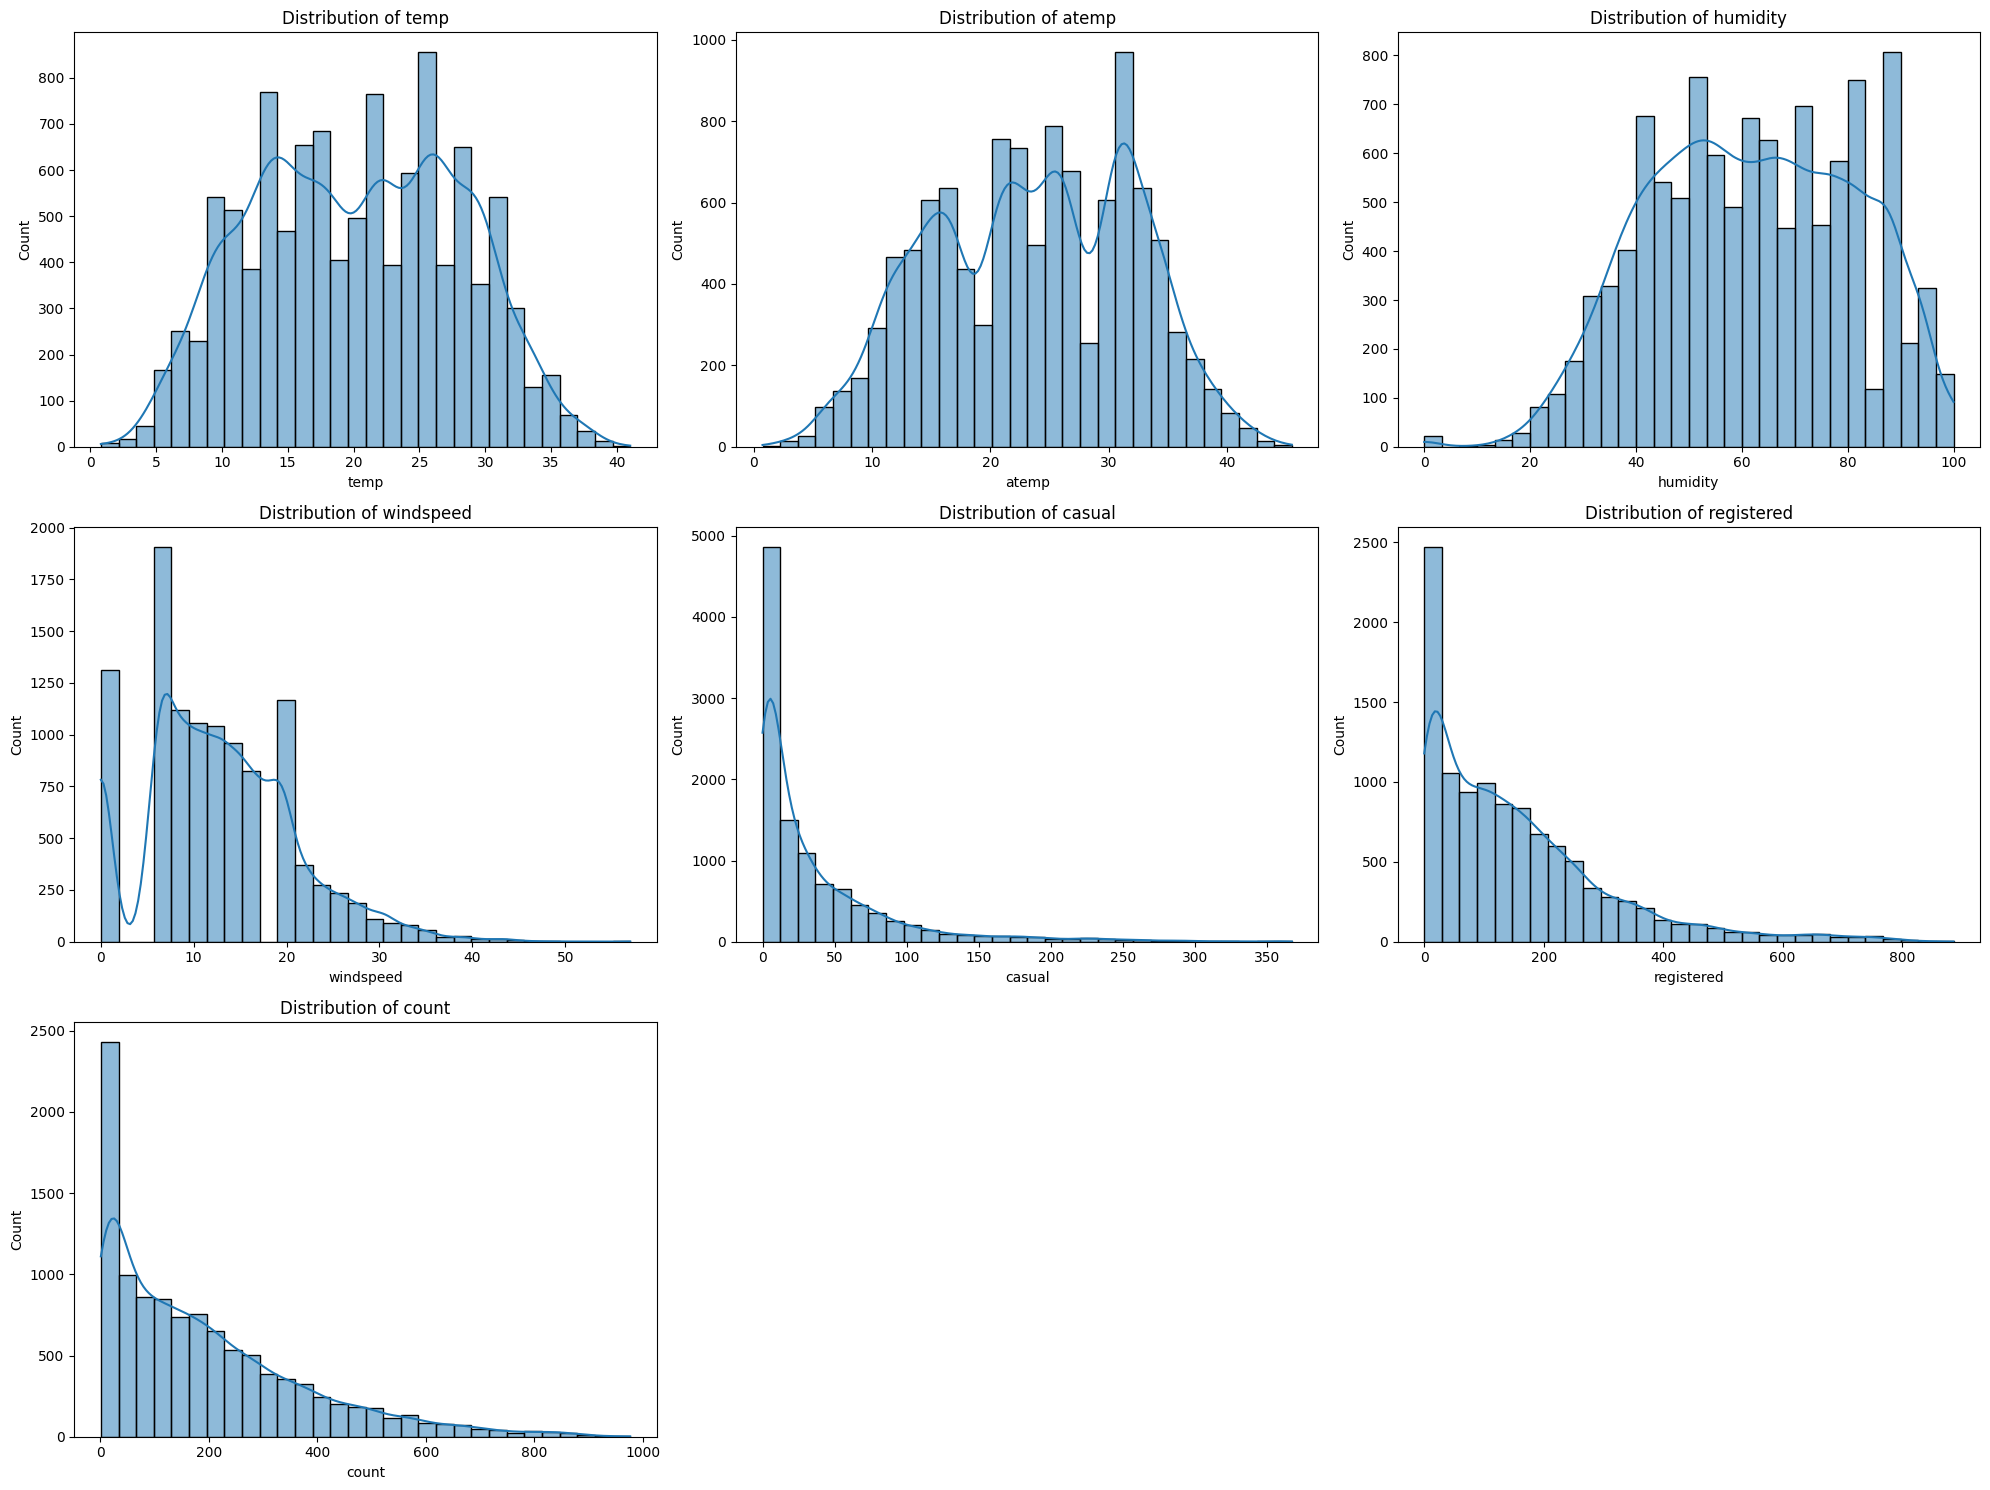

In [79]:

# Adjusted conversion of 'datetime' from object to datetime data type with the correct format
df['datetime'] = pd.to_datetime(df['datetime'], format='%d-%m-%Y %H:%M')

# Continue with the extraction of components from 'datetime' for analysis
df['hour'] = df['datetime'].dt.hour
df['day'] = df['datetime'].dt.day
df['month'] = df['datetime'].dt.month
df['year'] = df['datetime'].dt.year


# Univariate Analysis for continuous variables
continuous_vars = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

plt.figure(figsize=(20, 15))
for i, var in enumerate(continuous_vars, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[var], kde=True, bins=30)
    plt.title(f'Distribution of {var}')

plt.tight_layout()
plt.show()






In [65]:
'''

Temperature (temp) and Feels-Like Temperature (atemp):
Both these variables show a somewhat similar distribution, indicating a positive skewness where a majority of the data points are 
concentrated around the median, extending towards higher temperatures. This could suggest that the usage of cycles might be higher in
moderate to warm conditions.

Humidity:
The distribution of humidity is quite broad, with a slight skew towards higher values. This indicates variability in cycle usage 
across different levels of humidity, with a notable number of days having high humidity.

Windspeed:
Windspeed has a right-skewed distribution, indicating that most days have lower windspeeds, with fewer occurrences of high windspeed days.
Lower windspeeds might be more conducive to cycling.

Casual and Registered Users (casual, registered): 
Both distributions are right-skewed, indicating that there are more days with lower numbers of users, but there are occasional days 
with very high usage. The distribution of registered users seems to be more spread out compared to casual users, suggesting that registered
users contribute more consistently to the demand.

Total Count (count): 
The total count of rented bikes, including both casual and registered users, also shows a right-skewed distribution.
This indicates that while there are many days with lower usage, peak usage days can significantly exceed the average.

'''

'\n\nTemperature (temp) and Feels-Like Temperature (atemp):\nBoth these variables show a somewhat similar distribution, indicating a positive skewness where a majority of the data points are \nconcentrated around the median, extending towards higher temperatures. This could suggest that the usage of cycles might be higher in\nmoderate to warm conditions.\n\nHumidity:\nThe distribution of humidity is quite broad, with a slight skew towards higher values. This indicates variability in cycle usage \nacross different levels of humidity, with a notable number of days having high humidity.\n\nWindspeed:\nWindspeed has a right-skewed distribution, indicating that most days have lower windspeeds, with fewer occurrences of high windspeed days.\nLower windspeeds might be more conducive to cycling.\n\nCasual and Registered Users (casual, registered): \nBoth distributions are right-skewed, indicating that there are more days with lower numbers of users, but there are occasional days \nwith very hi

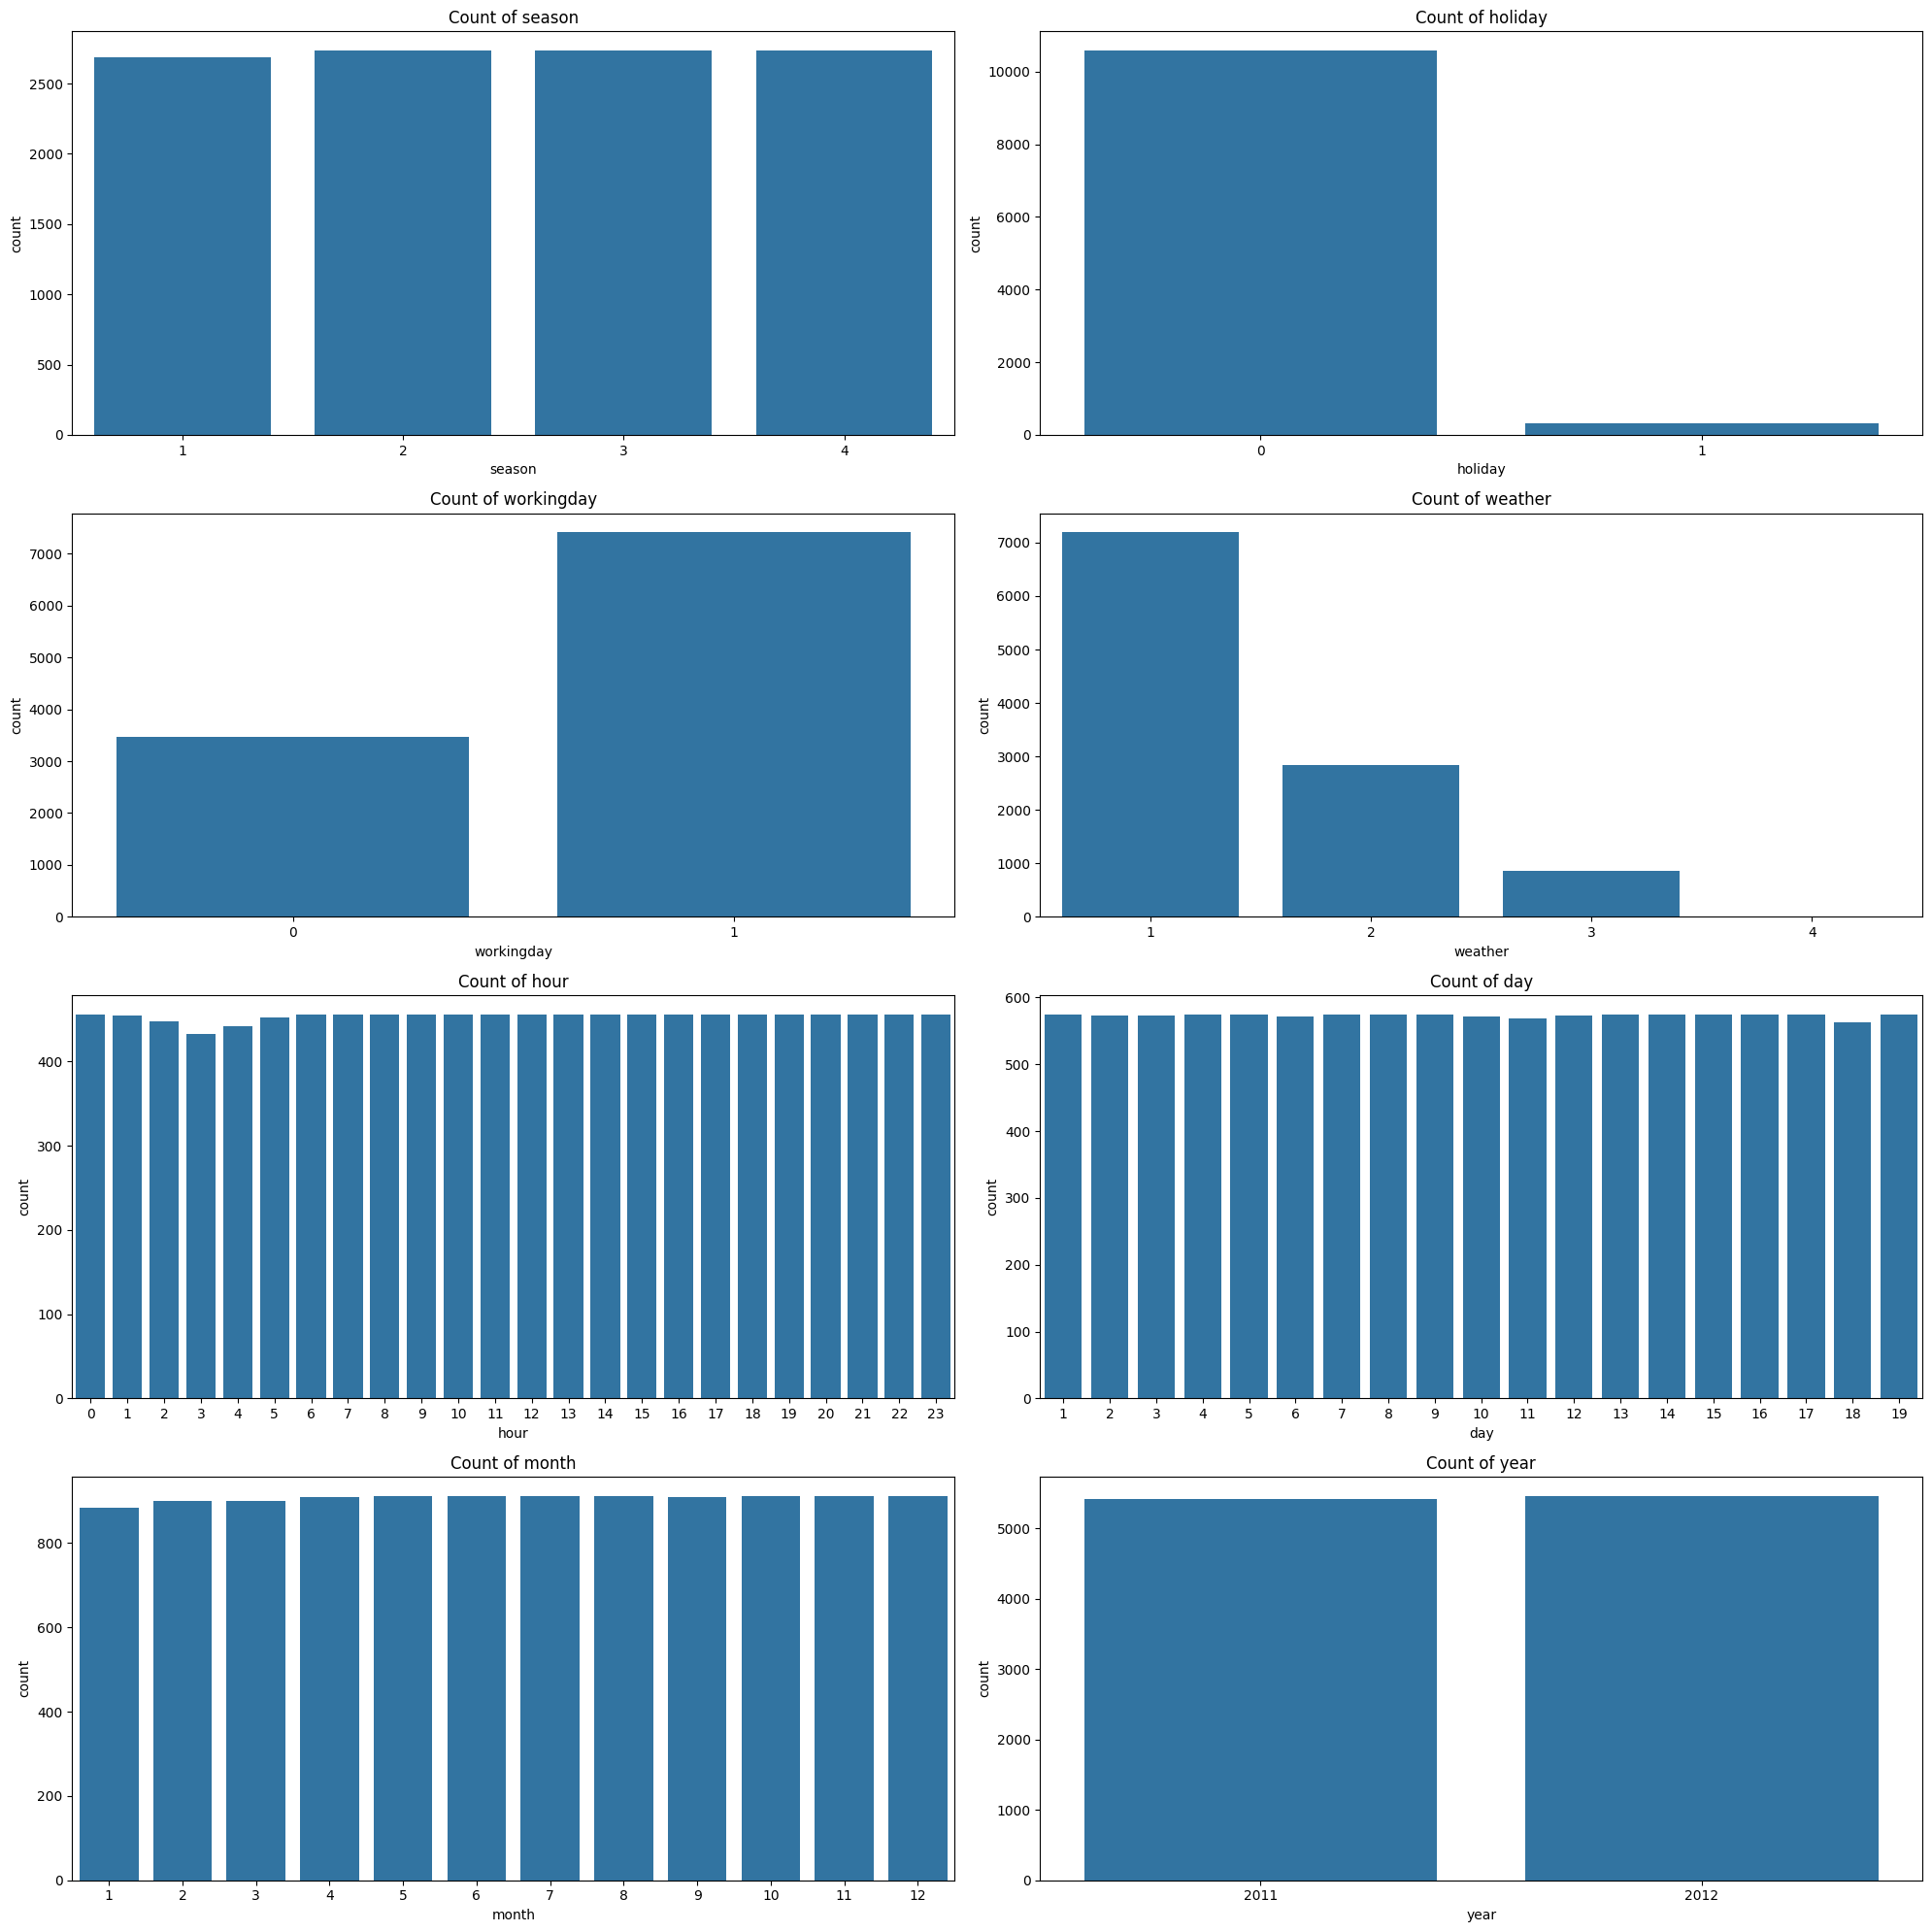

In [66]:

# Univariate Analysis for categorical variables
categorical_vars = ['season', 'holiday', 'workingday', 'weather', 'hour', 'day', 'month', 'year']

plt.figure(figsize=(20, 20))
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(4, 2, i)
    sns.countplot(x=var, data=df)
    plt.title(f'Count of {var}')

plt.tight_layout()
plt.show()

In [67]:
'''
Season: The countplot for seasons shows a relatively balanced distribution of days across the seasons, indicating that data
collection spans evenly through different seasons.

Holiday: The majority of the data points are on non-holiday days, which is expected given the relatively fewer holidays in a year.

Working Day: There are more working days than non-working days in the dataset.

Weather: The distribution heavily favors categories 1 and 2, which represent clearer weather conditions. Categories 3 and 4, 
representing adverse weather conditions, have significantly fewer occurrences, which could influence cycling preferences.

Hour: The hourly distribution reveals peak periods, likely corresponding to morning and evening commute times. There are dips during 
late-night and early-morning hours, indicating lower usage.

Day and Month: The distribution across days of the month is relatively uniform, indicating a consistent data collection process. 
The monthly distribution shows some variation, which could be influenced by seasonal changes and weather conditions.

Year: The dataset may cover years 2012 and 2013, showing a distribution that could help analyze trends over time.

'''

'\nSeason: The countplot for seasons shows a relatively balanced distribution of days across the seasons, indicating that data\ncollection spans evenly through different seasons.\n\nHoliday: The majority of the data points are on non-holiday days, which is expected given the relatively fewer holidays in a year.\n\nWorking Day: There are more working days than non-working days in the dataset.\n\nWeather: The distribution heavily favors categories 1 and 2, which represent clearer weather conditions. Categories 3 and 4, \nrepresenting adverse weather conditions, have significantly fewer occurrences, which could influence cycling preferences.\n\nHour: The hourly distribution reveals peak periods, likely corresponding to morning and evening commute times. There are dips during \nlate-night and early-morning hours, indicating lower usage.\n\nDay and Month: The distribution across days of the month is relatively uniform, indicating a consistent data collection process. \nThe monthly distribut

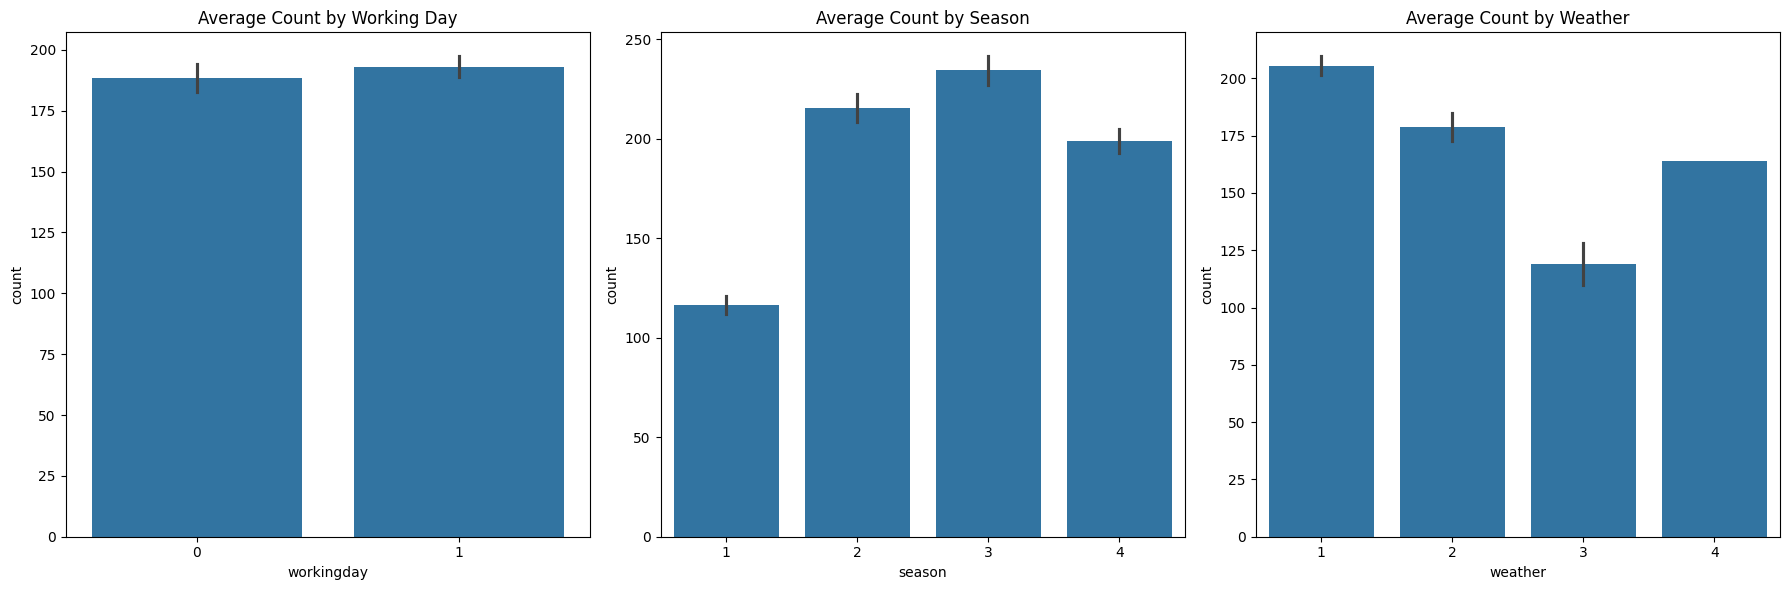

In [68]:


plt.figure(figsize=(18, 6))

# Relationship between 'workingday' and 'count'
plt.subplot(1, 3, 1)
sns.barplot(x='workingday', y='count', data=df)
plt.title('Average Count by Working Day')

# Relationship between 'season' and 'count'
plt.subplot(1, 3, 2)
sns.barplot(x='season', y='count', data=df)
plt.title('Average Count by Season')

# Relationship between 'weather' and 'count'
plt.subplot(1, 3, 3)
sns.barplot(x='weather', y='count', data=df)
plt.title('Average Count by Weather')

plt.tight_layout()
plt.show()


In [69]:
'''
Working Day and Count
The average count of rented bikes does not show a significant difference between working days and non-working days.
This suggests that the demand for Yulu's shared electric cycles is relatively stable throughout the week, indicating a consistent
need for micro-mobility solutions regardless of the day type.


Season and Count
There is a noticeable variation in the average count of rented bikes across different seasons.
The demand appears to be higher in certain seasons, which could be due to more favorable weather conditions for cycling.
Identifying the specific season(s) with the highest demand can help Yulu optimize their fleet management and marketing strategies to cater 
to seasonal variations in user behavior.


Weather and Count
The average count of rented bikes shows a clear dependency on weather conditions. Generally, more favorable weather conditions
(represented by lower weather codes) are associated with higher usage. Adverse weather conditions, which likely correspond to 
higher weather codes, see a drop in the demand for rented bikes. This insight is crucial for Yulu, as it highlights the importance of weather 
forecasting in managing their operations and potentially developing weather-adaptive strategies to maintain or boost demand.

'''

"\nWorking Day and Count\nThe average count of rented bikes does not show a significant difference between working days and non-working days.\nThis suggests that the demand for Yulu's shared electric cycles is relatively stable throughout the week, indicating a consistent\nneed for micro-mobility solutions regardless of the day type.\n\n\nSeason and Count\nThere is a noticeable variation in the average count of rented bikes across different seasons.\nThe demand appears to be higher in certain seasons, which could be due to more favorable weather conditions for cycling.\nIdentifying the specific season(s) with the highest demand can help Yulu optimize their fleet management and marketing strategies to cater \nto seasonal variations in user behavior.\n\n\nWeather and Count\nThe average count of rented bikes shows a clear dependency on weather conditions. Generally, more favorable weather conditions\n(represented by lower weather codes) are associated with higher usage. Adverse weather co

In [70]:
'''

1.Temporal Factors: 
The demand for electric cycles shows significant variations across different times of the day,
with peak periods likely corresponding to typical commute hours. This suggests that a substantial portion of the usage might be for commuting purposes.

2.Weather Dependency:
The demand is clearly influenced by weather conditions, with better weather correlating to higher usage.
This underscores the need for Yulu to consider weather forecasts in their operational and strategic planning.

3.Seasonality:
The variation in demand across seasons suggests that certain times of the year are more favorable for cycling, possibly due to weather
conditions and holidays.

4.User Segmentation: 
The distinction between casual and registered users, evident from the univariate analysis, indicates differing usage
patterns that might require targeted strategies.

Comments on Range of Attributes and Outliers

- Attributes like temperature, humidity, and windspeed show a broad range, suggesting variability in daily weather conditions. 
- Outliers are particularly notable in the `casual`, `registered`, and `count` variables, where certain days have significantly higher
numbers of bike rentals. These could be days with special events or particularly favorable weather conditions.

Comments on the Distribution of Variables

- Continuous variables like temperature and windspeed generally show a normal or slightly skewed distribution, indicating a range 
of weather conditions over the dataset period.
- The distribution of `casual` and `registered` users, and by extension the `count`, is right-skewed, showing that higher usage
days are less frequent but significant.

Comments for Each Univariate and Bivariate Plot

Univariate Plots: Show that the demand is not uniform across different hours, days, and months, reflecting complex user
behavior and external factors influencing demand. The plots for continuous variables like temperature and humidity suggest
a range of environmental conditions, with the majority being moderate, which is typically favorable for cycling.

Bivariate Plots: The relationships between `workingday`, `season`, `weather`, and `count` indicate that external
factors have a significant impact on demand. Notably, the demand does not vary significantly between working days and non-working days, 
suggesting a steady need for mobility solutions. However, season and weather conditions show a clear impact on demand, with certain seasons
and better weather conditions correlating with higher usage.

'''

'\n\n1.Temporal Factors: \nThe demand for electric cycles shows significant variations across different times of the day,\nwith peak periods likely corresponding to typical commute hours. This suggests that a substantial portion of the usage might be for commuting purposes.\n\n2.Weather Dependency:\nThe demand is clearly influenced by weather conditions, with better weather correlating to higher usage.\nThis underscores the need for Yulu to consider weather forecasts in their operational and strategic planning.\n\n3.Seasonality:\nThe variation in demand across seasons suggests that certain times of the year are more favorable for cycling, possibly due to weather\nconditions and holidays.\n\n4.User Segmentation: \nThe distinction between casual and registered users, evident from the univariate analysis, indicates differing usage\npatterns that might require targeted strategies.\n\nComments on Range of Attributes and Outliers\n\n- Attributes like temperature, humidity, and windspeed show

In [71]:
'''

2- Sample T-Test to check if Working Day has an effect on the number of electric cycles rented

H0: no significant difference in the mean number of electric cycles rented on working days compared to non-working days.

Ha: there is a significant difference in the mean number of electric cycles rented on working days compared to non-working days.

'''

'\n\n2- Sample T-Test to check if Working Day has an effect on the number of electric cycles rented\n\nH0: no significant difference in the mean number of electric cycles rented on working days compared to non-working days.\n\nHa: there is a significant difference in the mean number of electric cycles rented on working days compared to non-working days.\n\n'

In [72]:
from scipy.stats import ttest_ind


working_days = df[df['workingday'] == 1]['count']
non_working_days = df[df['workingday'] == 0]['count']

t_stat, p_value = ttest_ind(working_days, non_working_days, equal_var=False)

print('Test statistic value is : ',t_stat, '\n', 
      'P Value is : ',p_value)


# Significance level
alpha = 0.01

# Check the p-value condition
if p_value < alpha:
    print("Reject the null hypothesis (H0), suggesting a significant effect of working day on cycle rentals.")
else:
    print("Fail to reject the null hypothesis (H0), suggesting no significant effect of working day on cycle rentals.")



Test statistic value is :  1.2362580418223226 
 P Value is :  0.216403122806951
Fail to reject the null hypothesis (H0), suggesting no significant effect of working day on cycle rentals.


In [73]:
'''
 any observed difference could be due to chance, and there's not enough evidence to suggest that working days have an effect 
 on the number of cycles rented.
'''

"\n any observed difference could be due to chance, and there's not enough evidence to suggest that working days have an effect \n on the number of cycles rented.\n"

In [74]:
'''

ANNOVA to check if No. of cycles rented is similar or different in different 1. weather 2. season 


For Weather Conditions
Null Hypothesis : The average number of cycles rented is the same across all weather conditions.
Alternative Hypothesis : At least one of the weather conditions has a different average number of cycles rented compared to the others.


For Seasons
Null Hypothesis : The average number of cycles rented is the same across all seasons.
Alternative Hypothesis : At least one of the seasons has a different average number of cycles rented compared to the others.
'''

'\n\nANNOVA to check if No. of cycles rented is similar or different in different 1. weather 2. season \n\n\nFor Weather Conditions\nNull Hypothesis : The average number of cycles rented is the same across all weather conditions.\nAlternative Hypothesis : At least one of the weather conditions has a different average number of cycles rented compared to the others.\n\n\nFor Seasons\nNull Hypothesis : The average number of cycles rented is the same across all seasons.\nAlternative Hypothesis : At least one of the seasons has a different average number of cycles rented compared to the others.\n'

In [75]:
from scipy.stats import f_oneway

#group the data
grouped_weather = df.groupby('weather')['count']
grouped_season = df.groupby('season')['count']

#perform anova test
f_stat_weather, p_value_weather = f_oneway(*[group.values for name, group in grouped_weather])


f_stat_season, p_value_season = f_oneway(*[group.values for name, group in grouped_season])

print(f"ANOVA for Weather:\nF-Statistic: {f_stat_weather}, P-Value: {p_value_weather}")
print(f"ANOVA for Season:\nF-Statistic: {f_stat_season}, P-Value: {p_value_season}")


alpha = 0.01

#check p value
if p_value_weather < alpha:
    print("Reject H0_weather: At least one weather condition has a significantly different average number of cycles rented.")
else:
    print("Fail to reject H0_weather: No significant difference in the average number of cycles rented across weather conditions.")


if p_value_season < alpha:
    print("Reject H0_season: At least one season has a significantly different average number of cycles rented.")
else:
    print("Fail to reject H0_season: No significant difference in the average number of cycles rented across seasons.")



ANOVA for Weather:
F-Statistic: 65.53024112793271, P-Value: 5.482069475935669e-42
ANOVA for Season:
F-Statistic: 236.94671081032106, P-Value: 6.164843386499654e-149
Reject H0_weather: At least one weather condition has a significantly different average number of cycles rented.
Reject H0_season: At least one season has a significantly different average number of cycles rented.


In [76]:
'''
we reject the null hypothesis, indicating that there is a statistically significant difference in the average number of cycles
rented across the groups 
'''

'\nwe reject the null hypothesis, indicating that there is a statistically significant difference in the average number of cycles\nrented across the groups \n'

In [77]:
'''

Chi-square test to check if Weather is dependent on the season.

Null Hypothesis (H0): Weather is independent of Season. There is no association between the two variables,
implying that the weather conditions do not depend on the season.

Alternative Hypothesis (H1): Weather is dependent on Season. There is an association between the two variables,
suggesting that the distribution of weather conditions varies with the season.
'''

'\n\nChi-square test to check if Weather is dependent on the season.\n\nNull Hypothesis (H0): Weather is independent of Season. There is no association between the two variables,\nimplying that the weather conditions do not depend on the season.\n\nAlternative Hypothesis (H1): Weather is dependent on Season. There is an association between the two variables,\nsuggesting that the distribution of weather conditions varies with the season.\n'

In [78]:
from scipy.stats import chi2_contingency


#create contingency table
contingency_table = pd.crosstab(df['weather'], df['season'])

#perform chi square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)


print(f"Chi-square Statistic: {chi2}, P-value: {p_value}")


alpha = 0.01

#check p value condition
if p_value < alpha:
    print("Reject the null hypothesis (H0): There is a significant association between Weather and Season, suggesting dependency.")
else:
    print("Fail to reject the null hypothesis (H0): There is no significant association between Weather and Season, suggesting independence.")



Chi-square Statistic: 49.15865559689363, P-value: 1.5499250736864862e-07
Reject the null hypothesis (H0): There is a significant association between Weather and Season, suggesting dependency.
